To reference
    https://github.com/secnot/rectpack/blob/master/docs/maxrects.png
    https://www.instructables.com/The-Diagonal-Wrapping-Fallacy/

In [210]:
import math
def get_rects(x,y,z,name):
    x_rect=2*(x+z)
    y_rect=y+z

    x_alt=2*(y+z)
    y_alt=x+z
    
    #y_diag==SQRT((C14+C15)^2+(C13+C15)^2)
    y_diag=((x+z)**2+(y+z)**2)**0.5
    x_diag=(x_rect*y_rect)/y_diag
    return [(x_rect,y_rect,name),(x_alt,y_alt,name),(x_diag,y_diag,name+"_diag")]
    

In [187]:
get_rects(9.5,7.75,0.75,'lego')

[(20.5, 8.5, 'lego'),
 (17.0, 10.25, 'lego'),
 (13.085885326687748, 13.315873985585775, 'lego')]

In [211]:
def get_tuples(boxes):
    rects_conventional=[]
    rects_alt=[]
    rects_diagnol=[]

    for name in boxes:
        rects=get_rects(boxes[name][0],boxes[name][1],boxes[name][2],name)
        #print("got for {} : {}".format(name,rects))
        rects_conventional.append(rects[0])
        rects_alt.append(rects[1])
        rects_diagnol.append(rects[2])

    print(rects_conventional)
    print(rects_alt)
    print(rects_diagnol)

    tuples=(rects_conventional,rects_alt,rects_diagnol)
    return tuples

In [212]:
from rectpack import newPacker

def get_packs(rectangles):
    bins = [(72,30.5),(30,30.5)]


    packer = newPacker()

    # Add the rectangles to packing queue
    for r in rectangles:
        packer.add_rect(*r)

    # Add the bins where the rectangles will be placed
    for b in bins:
        packer.add_bin(*b)

    # Start packing
    packer.pack()
    
    return packer.rect_list()

In [213]:
import numpy as np

def get_ternary(i,n):
    ternary=np.base_repr(i,base=3)
    ternary_str=str(ternary)
    ternary_str_padded = ternary_str.rjust(n,'0')
    return ternary_str_padded
    

In [214]:
def apply_mask(mask,tuples):
    #given 3 tuples each n long apply a mask where 0122110 would take the first of the 1st tupe, second of second tuple, 3rd of 
    #third tuple
    ret_tuple=[]
    for i in range(len(mask)):
        trit=mask[i]
        ret_tuple.append(tuples[int(trit)][i])
    return ret_tuple
        

In [220]:
def pretty_dims(x,y):
    return("{:.3f}x{:.3f}".format(x,y))

In [233]:
boxes = {'fish':(12.5,9.5,2.0),'spiral':(9.5,7.75,0.75),'JH':(7.25,4.5,1.625),'cush':(12.5,12.5,5.0)}
n=len(boxes)

global_extent=1e6

tuples=get_tuples(boxes)

for i in range(3**n):
    mask = get_ternary(i,n)
    rects_to_pack=apply_mask(mask,tuples)
    packed_rects=get_packs(rects_to_pack)

    extent_of_this_packing = max([r[1]+r[3] for r in packed_rects])
    if extent_of_this_packing<global_extent:
        global_extent=extent_of_this_packing
        global_winning_mask=mask
        global_winning_rects=packed_rects
print("winner:{} cutouts:{} maximum_extent:{}".format(global_winning_mask,global_winning_rects,global_extent))
for rect in global_winning_rects:
    b, x, y, w, h, rid = rect
    print("b:{}\tbox:{}\tx:{} y:{}\t\t\t\tw:{} h:{}".format(b,rid, x, y, w, h))

[(29.0, 11.5, 'fish'), (35.0, 17.5, 'cush'), (20.5, 8.5, 'spiral'), (17.75, 6.125, 'JH')]
[(23.0, 14.5, 'fish'), (35.0, 17.5, 'cush'), (17.0, 10.25, 'spiral'), (12.25, 8.875, 'JH')]
[(18.02044661905928, 18.506755523321747, 'fish_diag'), (24.74873734152916, 24.748737341529164, 'cush_diag'), (13.085885326687748, 13.315873985585775, 'spiral_diag'), (10.082067589131142, 10.78337841309485, 'JH_diag')]
winner:0011 cutouts:[(0, 0, 0, 35.0, 17.5, 'cush'), (0, 0, 17.5, 29.0, 11.5, 'fish'), (0, 29.0, 17.5, 17.0, 10.25, 'spiral'), (0, 35.0, 0, 8.875, 12.25, 'JH')] maximum_extent:46.0
b:0	box:cush	x:0 y:0				w:35.0 h:17.5
b:0	box:fish	x:0 y:17.5				w:29.0 h:11.5
b:0	box:spiral	x:29.0 y:17.5				w:17.0 h:10.25
b:0	box:JH	x:35.0 y:0				w:8.875 h:12.25


/usr/local/lib/python3.4/dist-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


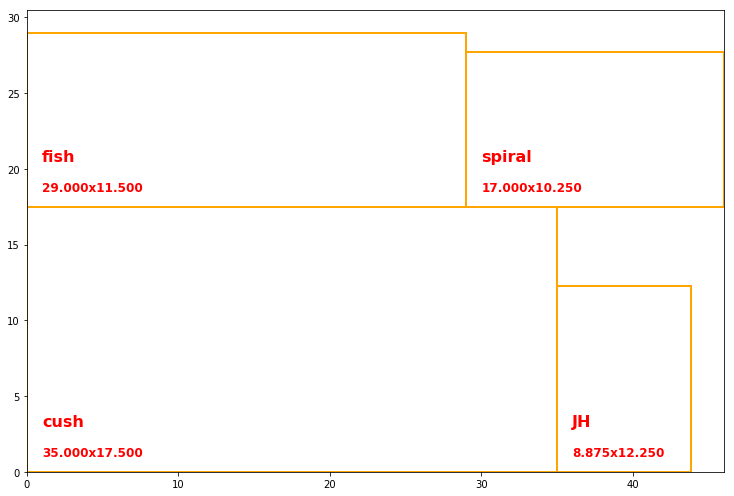

In [235]:
from matplotlib.collections import PatchCollection
import matplotlib
import matplotlib.pyplot as plt
import random

from matplotlib import pyplot as plt, patches
plt.rcParams["figure.figsize"] = [14.00, 7.00]
#plt.rcParams["figure.autolayout"] = True
#figure, _ = plt.subplots()

fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
plt.xlim([0, global_extent])
plt.ylim([0, 30.5])

ax = plt.gca()

for rect in global_winning_rects:
    b, x, y, w, h, rid = rect

    ax.add_patch(patches.Rectangle((x, y), w,h, edgecolor='orange',   facecolor='none', linewidth=2))
    plt.text(x+1, y+3,rid,fontsize=16, color="red", weight="bold")
    plt.text(x+1, y+1,pretty_dims(w,h),fontsize=12, color="red", weight="bold")


plt.show()